<a href="https://colab.research.google.com/github/AlexisCohen/Data-Sci/blob/main/Alexis_Cohen_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [58]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [59]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [62]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [63]:
url = "https://docs.google.com/presentation/d/1O5xh1OcvxaBpFidjHG86XxGljB38kZ5iOrBdFVRX69c/edit#slide=id.g1a1a0885f10_0_110"
#applies my link to the url variable

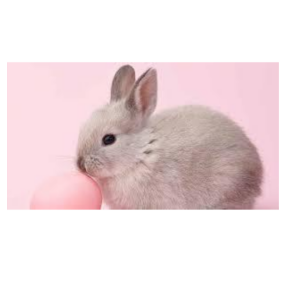

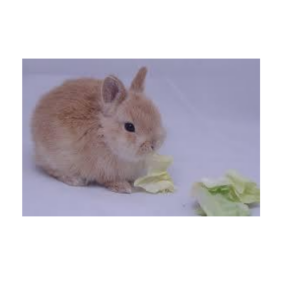

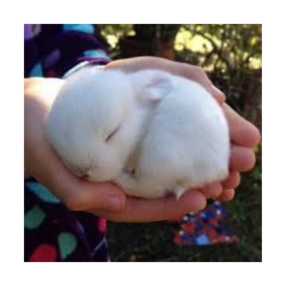

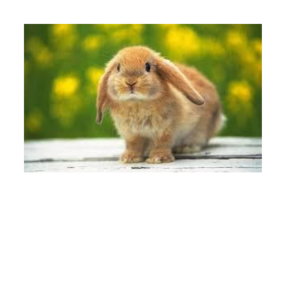

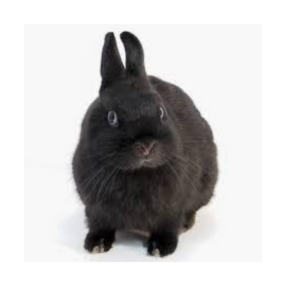

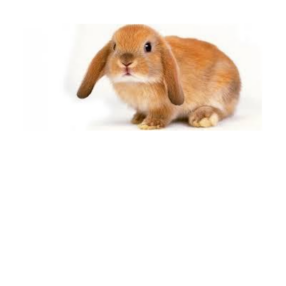

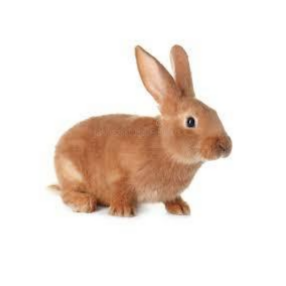

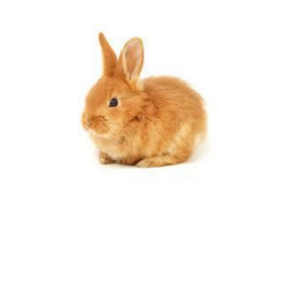

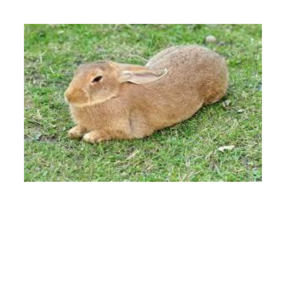

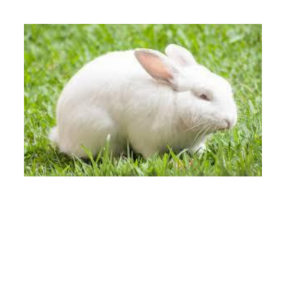

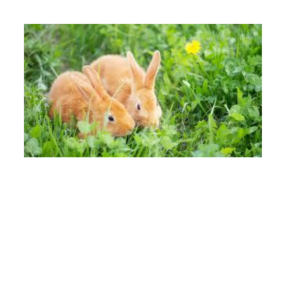

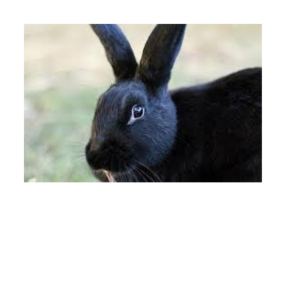

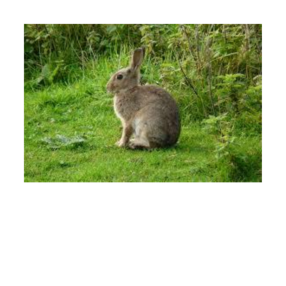

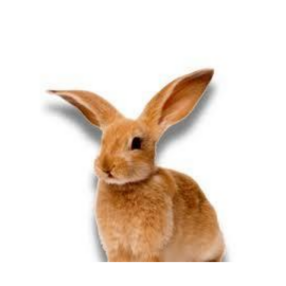

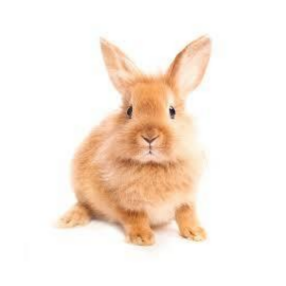

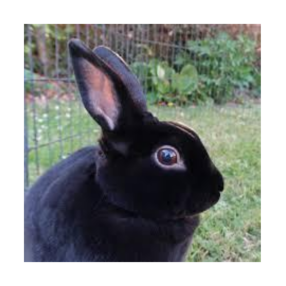

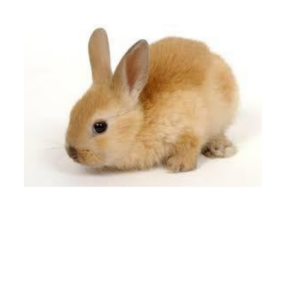

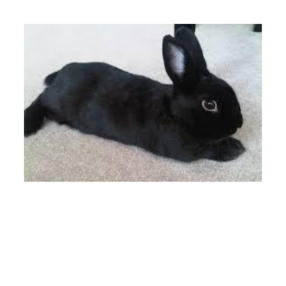

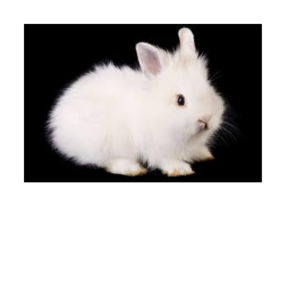

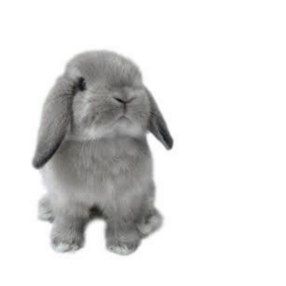

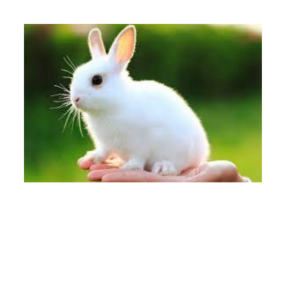

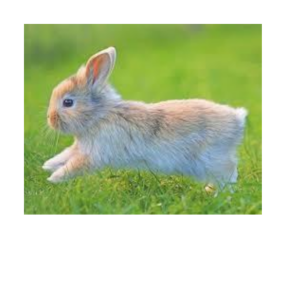

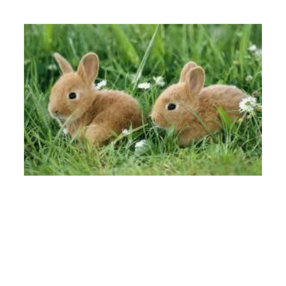

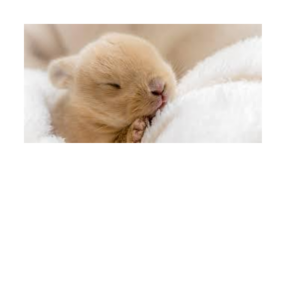

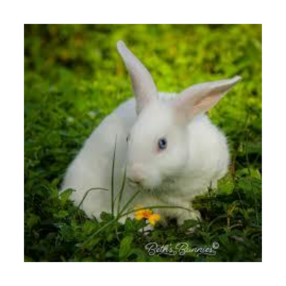

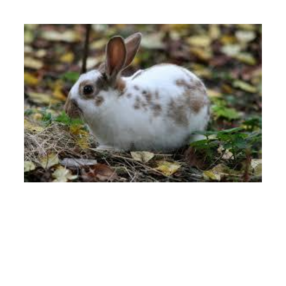

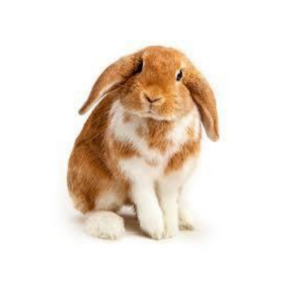

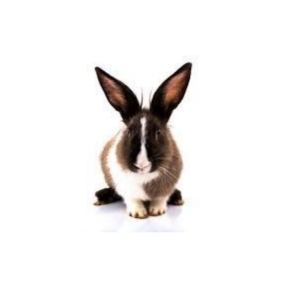

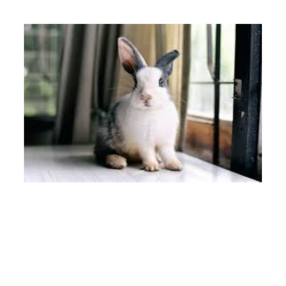

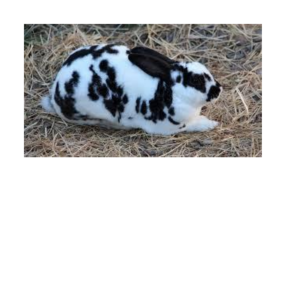

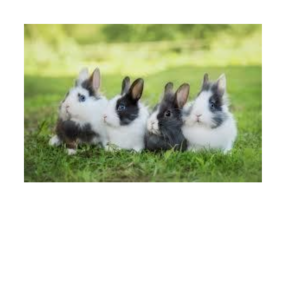

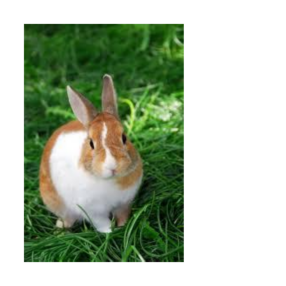

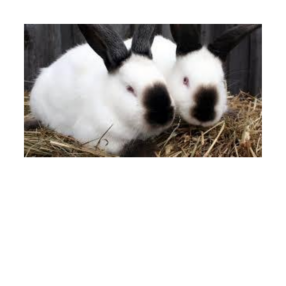

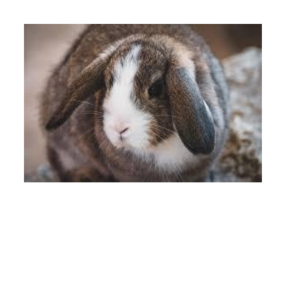

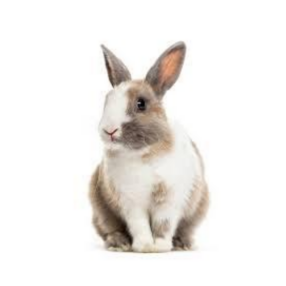

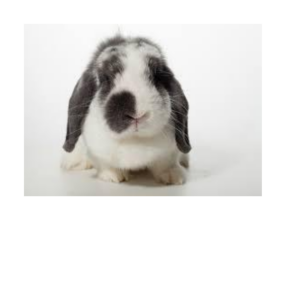

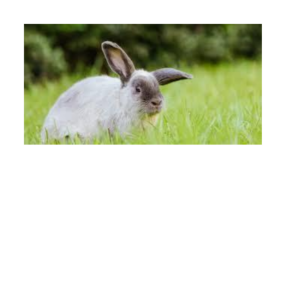

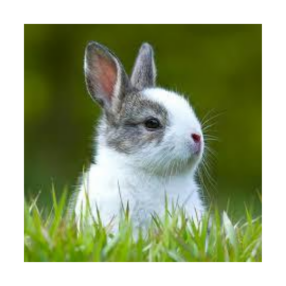

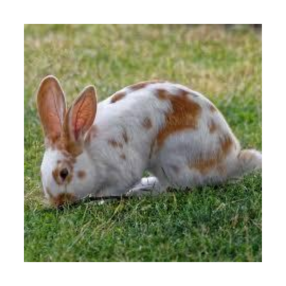

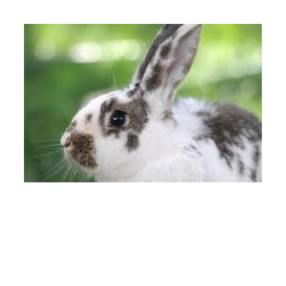

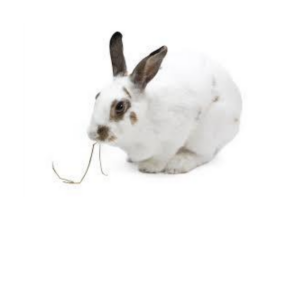

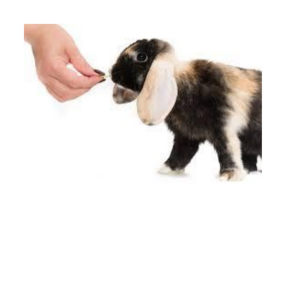

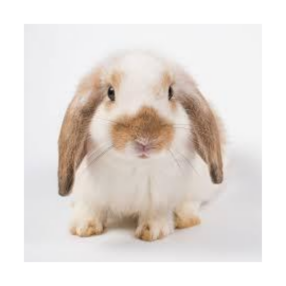

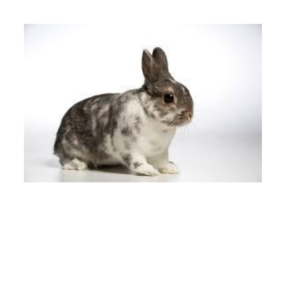

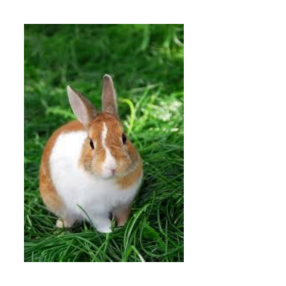

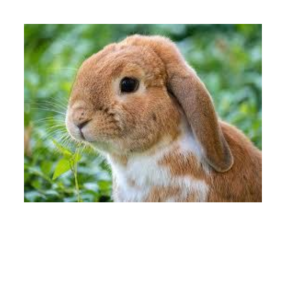

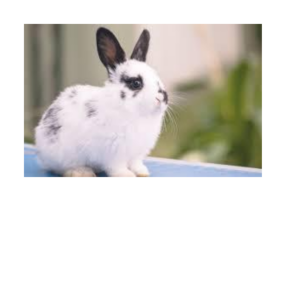

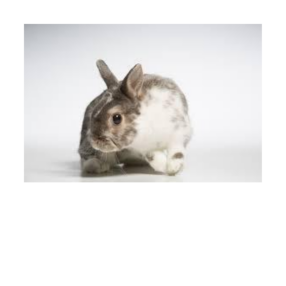

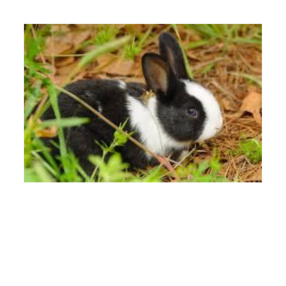

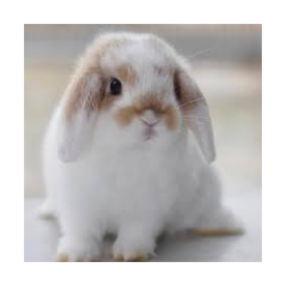

In [64]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)
#this inserts all the impages from the google slide presenation into the collab

In [65]:
images.shape
#this prints the shape of the variable images

torch.Size([50, 3, 224, 224])

In [66]:
model(images)

tensor([[-2.5638,  0.5679, -0.0578,  ..., -6.0314,  6.4744,  7.0717],
        [-4.0450,  0.5704, -1.7909,  ..., -3.5529,  7.0378,  4.4624],
        [ 3.5992,  2.6164,  4.9405,  ...,  0.6432,  1.5733, -0.8775],
        ...,
        [-1.0649, -1.8737,  0.1086,  ..., -2.6592,  5.9004,  1.8705],
        [-1.6729, -0.8074, -2.4075,  ..., -3.6035,  1.8410,  1.5744],
        [-2.7399,  1.2658,  2.8337,  ..., -3.0241, -1.2583,  3.6247]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [67]:
y = model(images)
#applies a new value to the variable y

In [68]:
y.shape
#prints the shape of the y array

torch.Size([50, 1000])

In [69]:
guesses = torch.argmax(y, 1).cpu().numpy()
#assigns a value to the variable guesses

In [70]:
for i in list(guesses):
    print(labels[i])
    #this goes through all the images and guesses based on a previosly established database what might be in the image

hare
hare
axolotl, mud puppy, Ambystoma mexicanum
Norfolk terrier
schipperke
Norfolk terrier
hare
hamster
guinea pig, Cavia cobaya
sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita
chow, chow chow
schipperke
wood rabbit, cottontail, cottontail rabbit
hare
Angora, Angora rabbit
schipperke
hamster
mousetrap
Angora, Angora rabbit
mink
hamster
hare
fox squirrel, eastern fox squirrel, Sciurus niger
Bedlington terrier
hare
ptarmigan
collie
Cardigan, Cardigan Welsh corgi
Siamese cat, Siamese
dalmatian, coach dog, carriage dog
Siberian husky
tiger cat
ping-pong ball
guinea pig, Cavia cobaya
Siamese cat, Siamese
Saint Bernard, St Bernard
hare
hare
Brittany spaniel
hare
hare
black-footed ferret, ferret, Mustela nigripes
guinea pig, Cavia cobaya
Cardigan, Cardigan Welsh corgi
tiger cat
Norfolk terrier
hare
wood rabbit, cottontail, cottontail rabbit
Cardigan, Cardigan Welsh corgi
guinea pig, Cavia cobaya


In [71]:
Y = np.zeros(50,)
Y[25:] = 1
#makes every image before 25 a 0 and ever image after a 1

In [72]:
Y
#prints the y variable

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [73]:
X = y.detach().cpu().numpy() 
#new value assigned to the X variable

In [74]:
X.shape
#the shape of the X variable

(50, 1000)

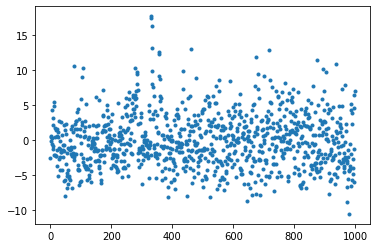

In [75]:
plt.plot(X[0],'.')
#this plots the first image in the X array

In [76]:
X[0]
#prints all the colors in the first item in the X array

array([-2.56378222e+00,  5.67917109e-01, -5.78083992e-02,  4.26417828e-01,
       -5.74050307e-01,  4.33228159e+00,  3.71670604e-01, -7.93694496e-01,
        2.22445416e+00, -1.26384985e+00,  3.20890951e+00, -2.13719559e+00,
        4.84425640e+00,  5.49101067e+00,  4.21968549e-01, -2.06777263e+00,
        1.76584721e+00,  1.43265319e+00, -2.24823165e+00, -2.21270180e+00,
        5.60683668e-01,  1.58709550e+00, -1.43173790e+00, -3.75721121e+00,
        1.16327620e+00, -5.16907310e+00,  4.15717959e-01, -2.64105177e+00,
       -1.15502667e+00,  2.69075656e+00, -4.31003284e+00, -1.65761083e-01,
       -1.19782007e+00, -2.46225739e+00, -1.73965991e+00, -1.74452519e+00,
        2.57892990e+00, -1.48768604e+00,  7.07962215e-01, -4.27454758e+00,
       -7.16663599e-01, -1.40942490e+00, -2.45401859e+00, -6.29149556e-01,
        2.14777517e+00, -5.78876591e+00, -1.60377324e+00,  1.43099523e+00,
       -5.72374058e+00, -7.97301292e+00, -3.43844247e+00,  8.09601367e-01,
        2.28000116e+00, -

In [77]:
np.argmax(X[0])

331

In [78]:
labels[948]
#this prints the label that is in the 948th position on the list/array

'Granny Smith'

In [79]:
top_ten = np.argsort(X[0])[::-1][0:10]
#this sorts the top ten most common labels from the ai guesses

In [80]:
for i in top_ten:
    print(labels[i])
    #this prints each label in the top ten

hare
wood rabbit, cottontail, cottontail rabbit
hamster
Angora, Angora rabbit
bucket, pail
piggy bank, penny bank
weasel
mink
mousetrap
tub, vat


In [81]:
labels
#this lists all the available labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 11.,  82., 222., 304., 214., 110.,  36.,  13.,   5.,   3.]),
 array([-10.531346 ,  -7.708726 ,  -4.8861055,  -2.063485 ,   0.7591356,
          3.581756 ,   6.4043765,   9.226997 ,  12.049618 ,  14.872238 ,
         17.694859 ], dtype=float32),
 <a list of 10 Patch objects>)

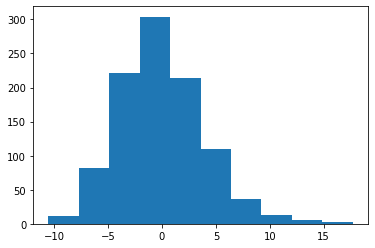

In [82]:
plt.hist(X[0])
#this is a histogram on the first item in the X array

In [83]:
X = GPU_data(X)
Y = GPU_data(Y)
#assigns new values to the variables X and Y

In [84]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [85]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [86]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [87]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [88]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [89]:
X.shape
#prints the shape of the variable X

torch.Size([50, 1000])

In [90]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

#this is a function that uses an if, else if statement that then returns the variables x and y

In [91]:
def model(x,w):

    return x@w[0]

#this models the variables x and w, then returns the first item in the x@w array

In [92]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [48]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


KeyboardInterrupt: ignored

https://tensorspace.org/

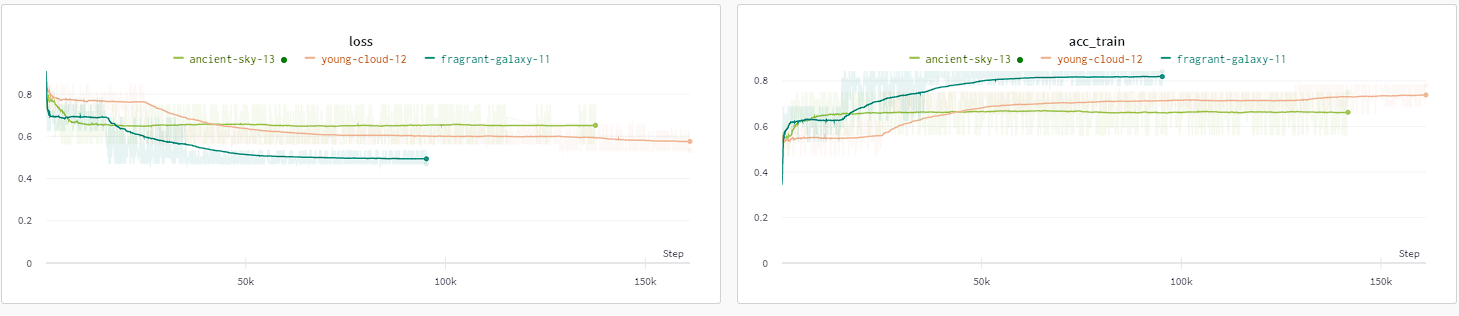

Best Run - fragrant galaxy 11 
Average Run - young cloud 12
Worst Run - ancient sky 13